# 6.4 Supervised Machine Learning: Regression

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

In [4]:
df = pd.read_csv('C:/Users/Kid/Desktop/Achievement 6/Data/Prepared Data/imdb_movies_cleaned_v2.csv', index_col=[0])

In [5]:
df.head()

title release_date  score  \
0                    Creed III   2023-03-02   73.0   
1     Avatar: The Way of Water   2022-12-15   78.0   
2  The Super Mario Bros. Movie   2023-04-05   76.0   
3                      Mummies   2023-01-05   70.0   
4                    Supercell   2023-03-17   61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew     status  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   Released   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   Released   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   Released   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   Released   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   Released   

             languages       budget       revenue  ...  \
0              English   75000000.0  2.716167e+08  ...   
1              English  460000000.0  2.316795e+09  ...   
2              English  100000000.0  7.244590e+08  ...   
3   Spanish, Castilian   12300000.0  3.420000e+07  ...   
4              English   77000000.0  3.409420e+08  ...   

                    country rating    primary_genre revenue_in_mil  \
0                 Australia   High            Drama         271.62   
1                 Australia   High  Science Fiction        2316.79   
2                 Australia   High        Animation         724.46   
3                 Australia   High        Animation          34.20   
4  United States of America    Mid           Action         340.94   

   budget_in_mil  budget_tier profitability  gross_profit   profit_tier   ROI  
0           75.0    High-tier          True        196.62   High profit  2.62  
1          460.0     Top-tier          True       1856.79  Giant profit  4.04  
2          100.0    High-tier          True        624.46  Giant profit  6.24  
3           12.3     Mid-tier          True         21.90    Low profit  1.78  
4           77.0    High-tier          True        263.94   High profit  3.43  

[5 rows x 21 columns]

## Data Exploration

<Axes: xlabel='budget_in_mil', ylabel='Count'>

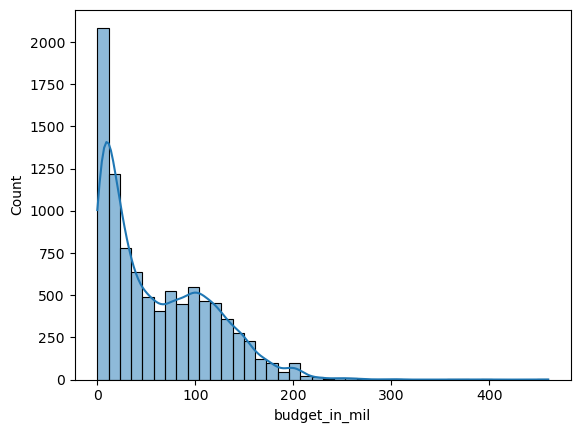

In [38]:
#visualizing distribution of budget
sns.histplot(df['budget_in_mil'], bins = 40, kde = True)

<Axes: xlabel='revenue_in_mil', ylabel='Count'>

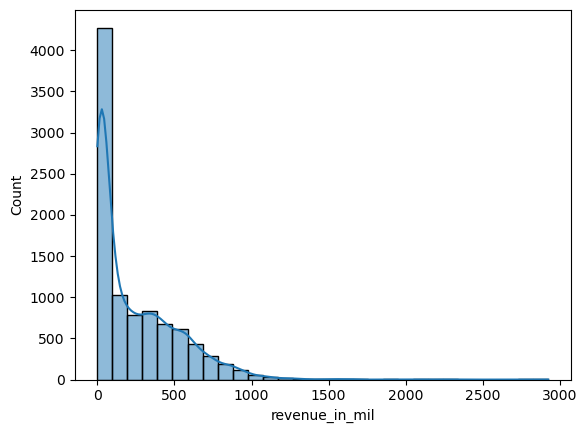

In [39]:
#visualizing distribution of revenue
sns.histplot(df['revenue_in_mil'], bins = 30, kde = True)

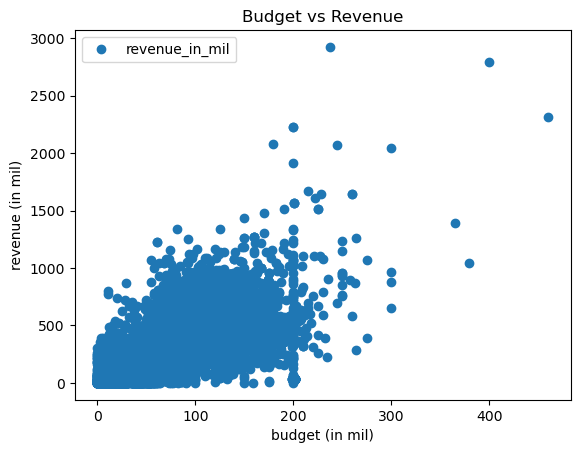

In [33]:
#visualizing the relationship between budget and revenue
df.plot(x = 'budget_in_mil', y='revenue_in_mil',style='o')
plt.title('Budget vs Revenue')
plt.xlabel('budget (in mil)')
plt.ylabel('revenue (in mil)')
plt.show()

#### Research Hypothesis:
>> #### "If a movie has a higher budget, then it will generate higher revenues."

## Preparing Data for Regression

In [14]:
#reshaping data
X = df['budget_in_mil'].values.reshape(-1, 1)
y = df['revenue_in_mil'].values.reshape(-1, 1)

In [15]:
X

array([[ 75. ],
       [460. ],
       [100. ],
       ...,
       [ 21.8],
       [116. ],
       [ 92.4]])

In [16]:
y

array([[ 271.62],
       [2316.79],
       [ 724.46],
       ...,
       [  23.  ],
       [ 475.66],
       [ 539.4 ]])

In [17]:
#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
#creating a regression object
regression = LinearRegression()

In [19]:
#fitting regression model onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
#predicting value of y based on X_test
y_predicted = regression.predict(X_test)

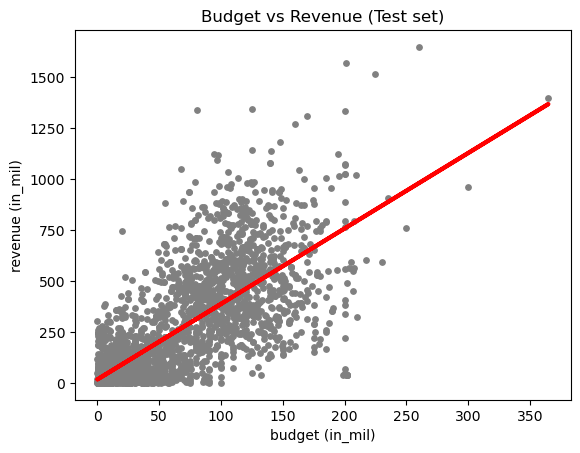

In [34]:
#visualizing model regression line on test set
plt.scatter(X_test, y_test, color='gray', s = 15)
plt.plot(X_test, y_predicted, color='red', linewidth =3)
plt.title('Budget vs Revenue (Test set)')
plt.xlabel('budget (in_mil)')
plt.ylabel('revenue (in_mil)')
plt.show()

#### Observation:
>> #### The model doesn't appear to be fit in predicting accurate future revenues based on budgets as shown by the wider spread of datapoints along the regression line.
>> #### This result is expected based on the non-linear relationship of the budget and revenue variables and the number of extreme values existing in both, present in this dataset.
>> #### The model's inefficiency to predict accurate results reflects the limitation of the data and could be attributed to a collection and/or exclusion bias. As discussed in the data sourcing section, the author of this dataset mentionned the data was collected by means of web-scraping, but provided no details on whether certain criteria or conditions was applied to this collection method.

In [35]:
#outputing model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.6994565]]
Mean squared error:  31661.899217149396
R2 score:  0.5369514777016111


#### Observation:
>> #### The Mean Squared Error value shows the great distance between the datapoints and regression line. 
>> #### The R2 score shows that the regression model is at ~ 54% efficiency in predicting future movies revenues.


In [40]:
#comparing predicted and actual y values
data_comp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_comp.head(30)

Actual   Predicted
0    95.26  386.586259
1     3.24   51.563479
2     0.94   40.687077
3   114.83  164.618869
4   184.93   22.152800
5     0.49   31.068490
6   716.72  392.875335
7   563.06  498.309846
8    78.70   27.738979
9   414.55  349.961640
10   84.17   37.542539
11  312.97  278.340162
12   30.04   61.034087
13   42.00   38.837348
14   19.50   77.237707
15  539.40  358.470390
16   69.53   20.118098
17   31.67   57.334631
18  707.74  482.772128
19   44.57   53.635174
20    8.00   16.899571
21  177.24  423.580824
22  475.70  312.597129
23  170.65   57.334631
24   12.31  218.630934
25  675.97  481.292346
26   83.31  201.613434
27   80.77  238.607999
28   50.67  130.102940
29  126.74   32.548272

#### Observation:
>> #### We can see that the predicted y-values are way off from the actual values, which shows again the model's inefficiency in predicting future movies revenues based on the data we have.